# Making Subplots
- This tutorial can be found at this [link](https://www.pygmt.org/latest/tutorials/advanced/subplots.html)
- In this tutorial, we will be learning how to make subplots

In [1]:
import pygmt

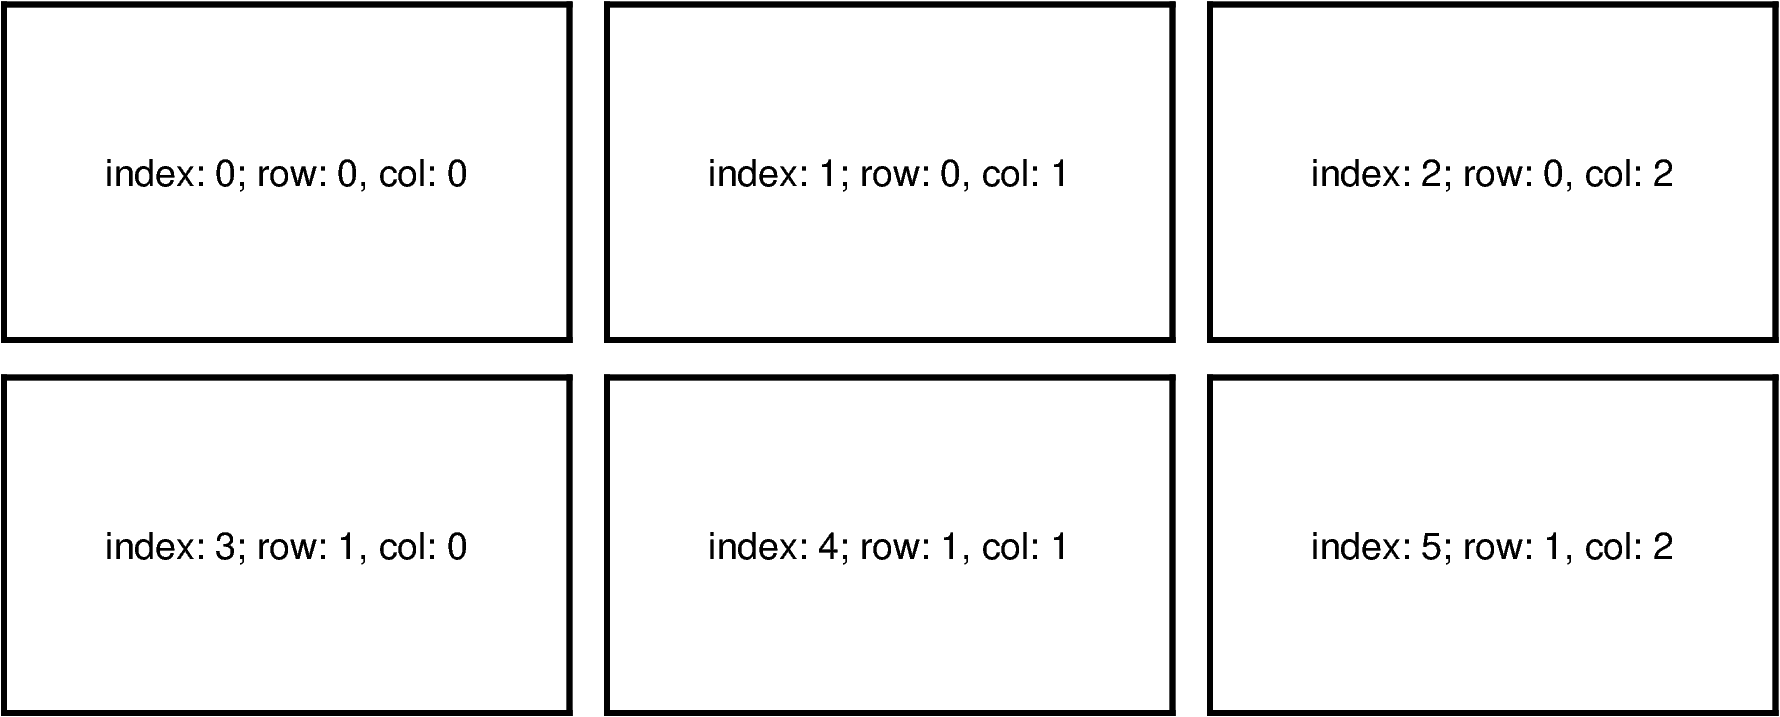

In [2]:
fig = pygmt.Figure()

# Defining a subplot with 2 rows and 3 columns
# The entire figure size is 15cm wide by 6cm high
with fig.subplot(nrows=2, ncols=3, figsize=("15c", "6c"), frame="lrtb"):
  for i in range(2):  # row number starting from 0
    for j in range(3):  # column number starting from 0
      index = i * 3 + j  # index number starting from 0
      with fig.set_panel(panel=index):  # sets the current panel
        fig.text(
          position="MC",
          text=f"index: {index}; row: {i}, col: {j}",
          region=[0, 1, 0, 1],
        )
fig.show()

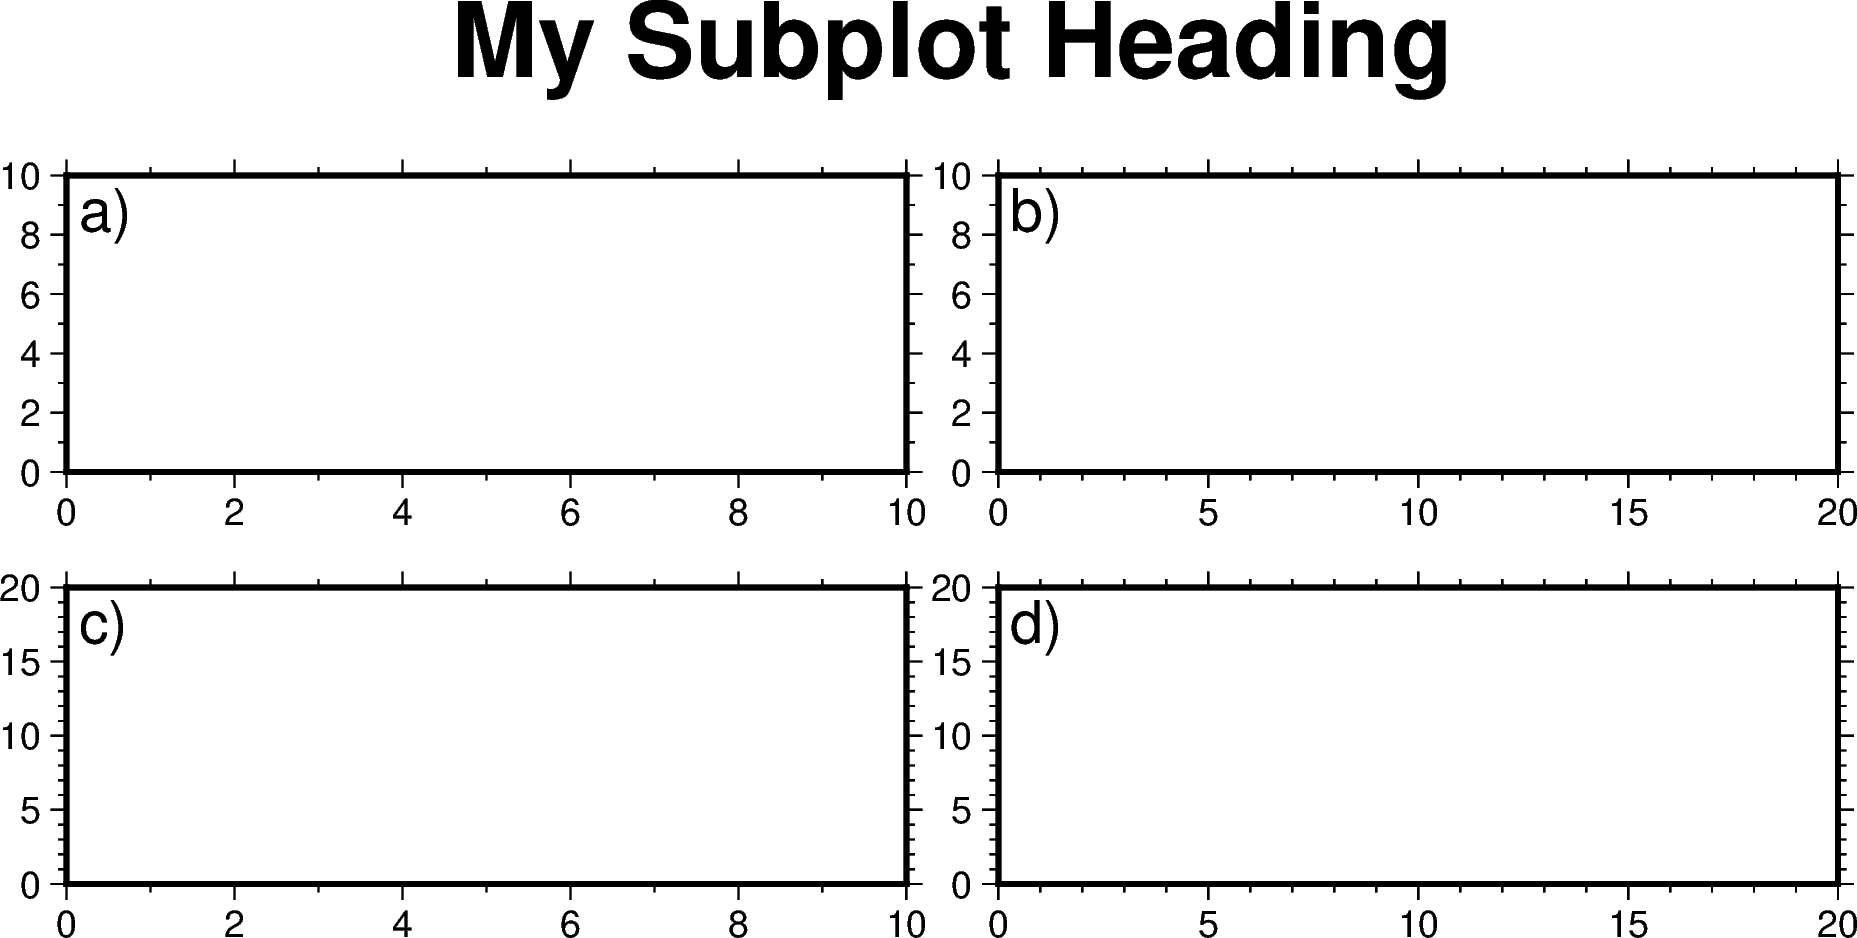

In [3]:
# Creating another subplot
fig = pygmt.Figure()
with fig.subplot(
    nrows=2, ncols=2, figsize=("15c", "6c"),
    autolabel=True, frame=["af", "WSne"],
    margins=["0.1c", "0.2c"], title="My Subplot Heading",
):
    fig.basemap(region=[0, 10, 0, 10], projection="X?", panel=[0, 0])
    fig.basemap(region=[0, 20, 0, 10], projection="X?", panel=[0, 1])
    fig.basemap(region=[0, 10, 0, 20], projection="X?", panel=[1, 0])
    fig.basemap(region=[0, 20, 0, 20], projection="X?", panel=[1, 1])
fig.show()

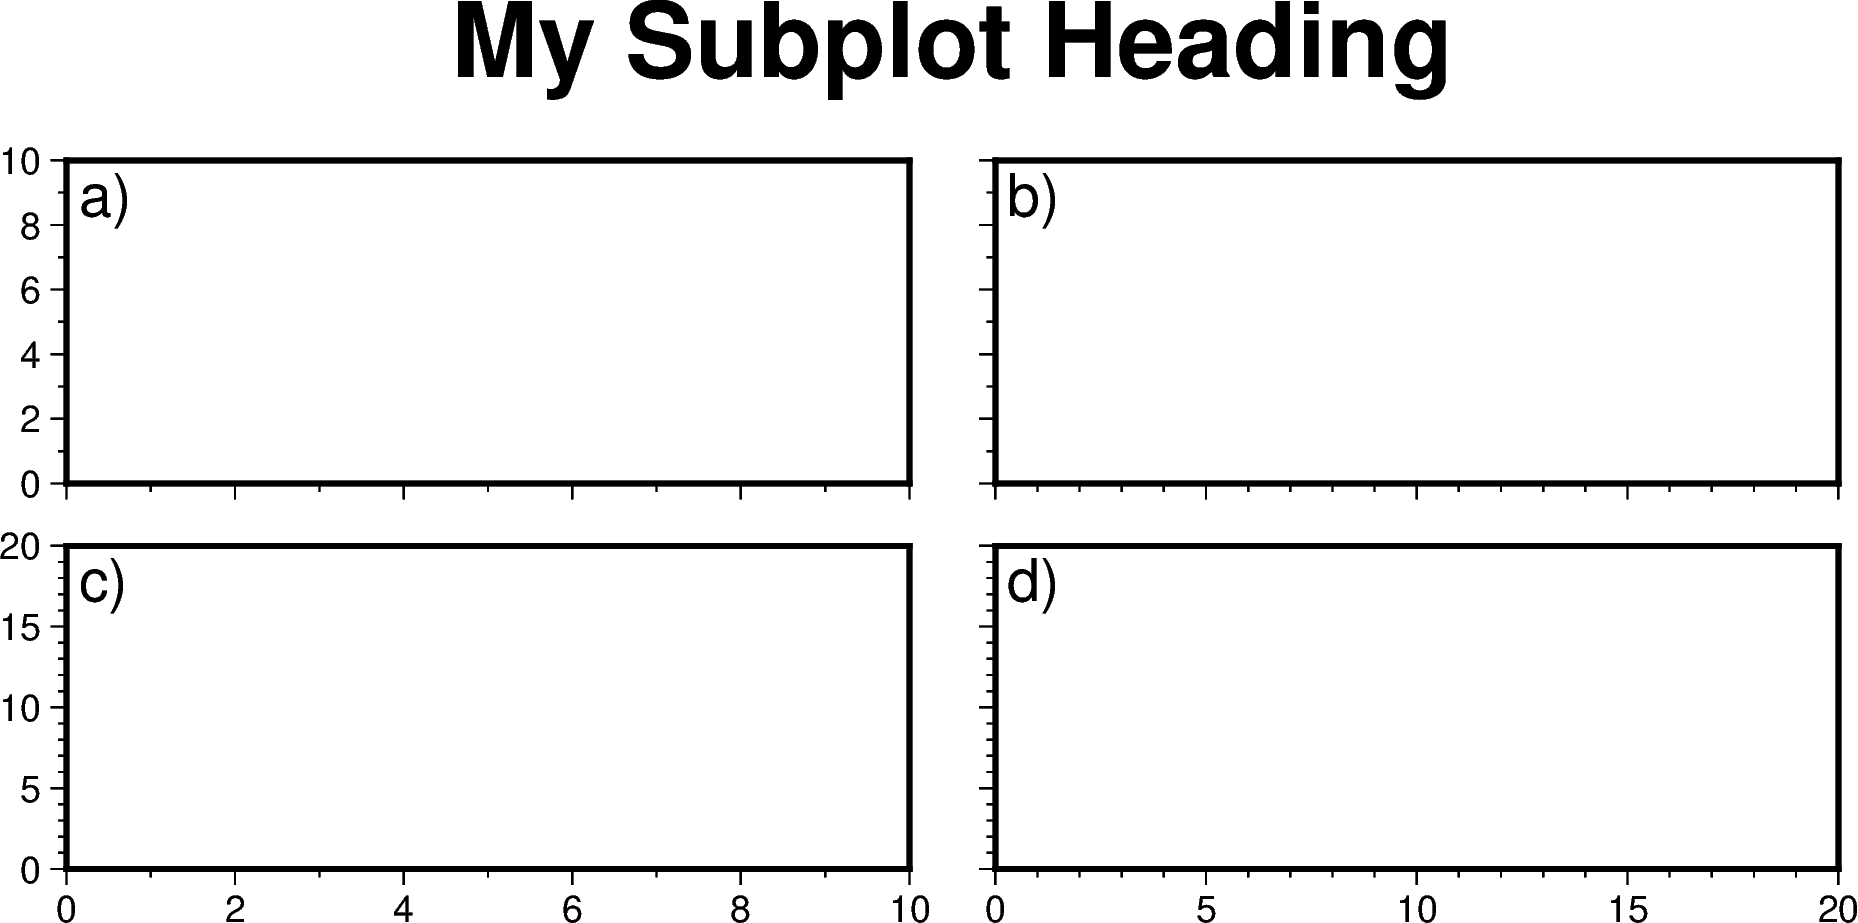

In [4]:
# Sharing X and Y axis labels
# Setting the "panel" as True to let GMT automatically active the next subplot panel
fig = pygmt.Figure()
with fig.subplot(
    nrows=2, ncols=2, figsize=("15c", "6c"),
    autolabel=True, frame=["WSrt"],
    margins=["0.3c", "0.2c"], title="My Subplot Heading",
    sharex="b",  # shared x-axis on the bottom side
    sharey="l",  # shared y-axis on the left side
):
    fig.basemap(region=[0, 10, 0, 10], projection="X?", panel=True)
    fig.basemap(region=[0, 20, 0, 10], projection="X?", panel=True)
    fig.basemap(region=[0, 10, 0, 20], projection="X?", panel=True)
    fig.basemap(region=[0, 20, 0, 20], projection="X?", panel=True)
fig.show()

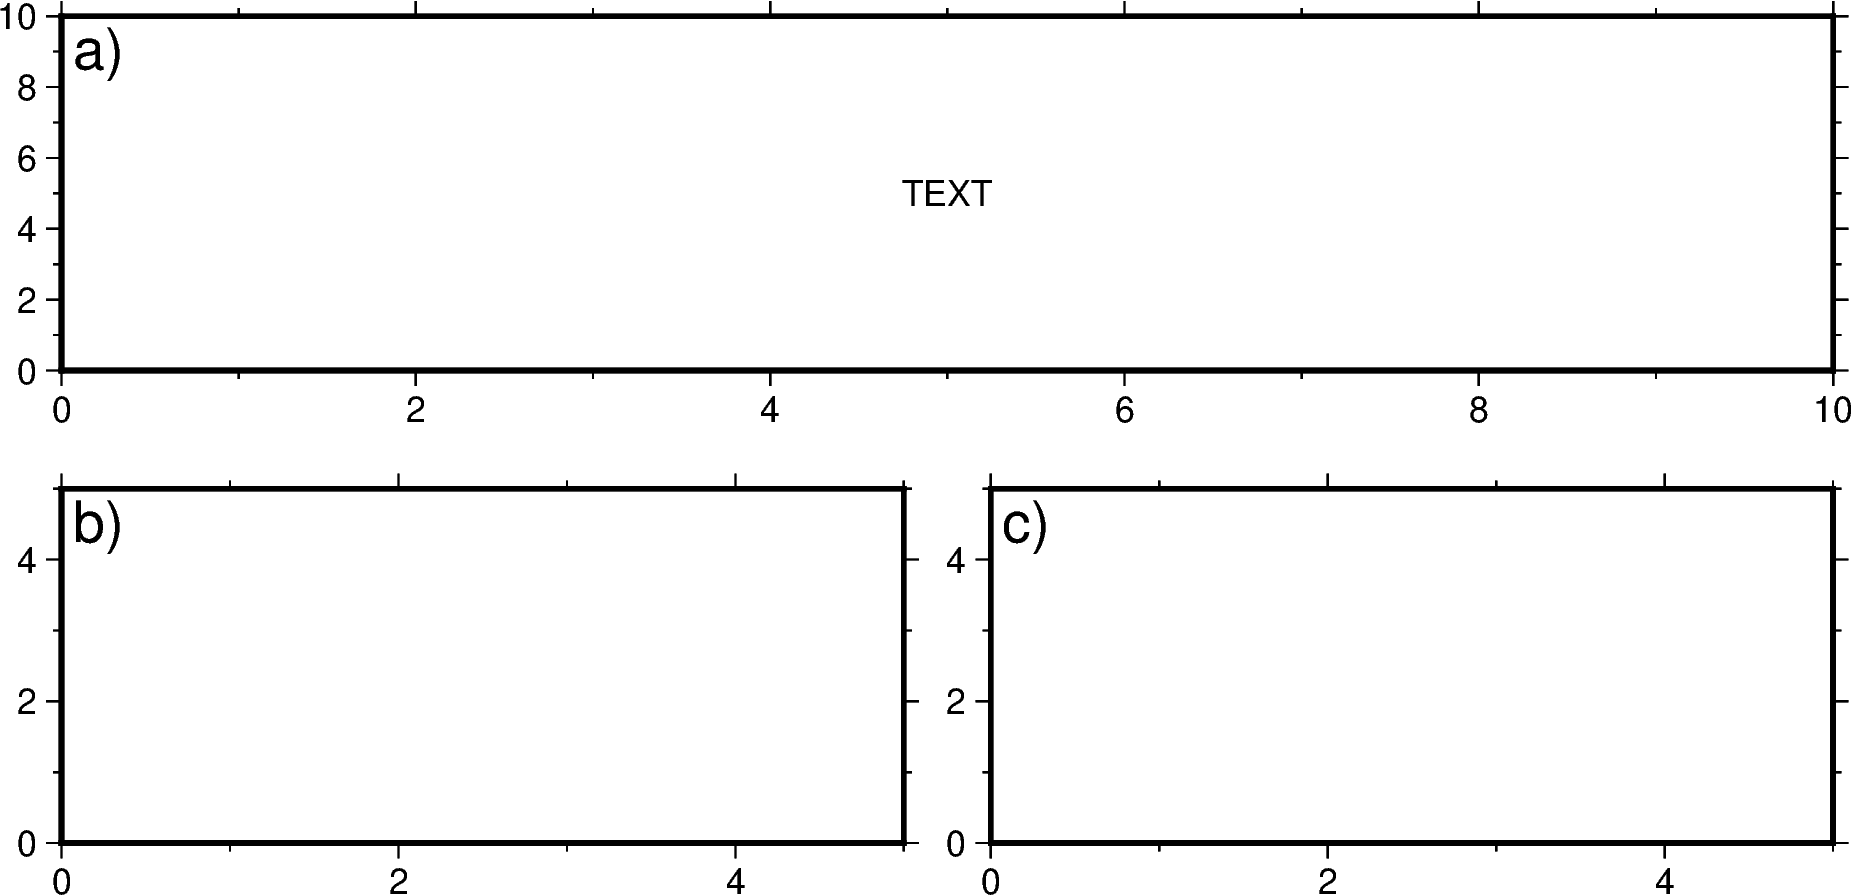

In [5]:
# Creating Nested Subplots (Not currently supported by the API)
# We will do this by using `subplot` multiple times, and shifting the origins accordingly
# for the different subplots
fig = pygmt.Figure()

# Bottom row, two subplots
with fig.subplot(nrows=1, ncols=2, figsize=("15c", "3c"), autolabel="b)"):
    fig.basemap(
        region=[0, 5, 0, 5], projection="X?", frame=["af", "WSne"], panel=[0, 0]
    )
    fig.basemap(
        region=[0, 5, 0, 5], projection="X?", frame=["af", "WSne"], panel=[0, 1]
    )
    
# Move plot origin by 1 cm above the height of the entire figure
fig.shift_origin(yshift="h+1c")
# Top row, one subplot
with fig.subplot(nrows=1, ncols=1, figsize=("15c", "3c"), autolabel="a)"):
    fig.basemap(
        region=[0, 10, 0, 10], projection="X?", frame=["af", "WSne"], panel=[0, 0]
    )
    fig.text(text="TEXT", x=5, y=5)

fig.show()